In [1]:
%pylab inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/var/folders/tw/zmm3b0k97wbfj0cl53y3w2nm0000gn/T/ipykernel_63347/395611636.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [79]:
import os
from scipy.interpolate import CubicSpline


In [178]:
t_array=evo[:,0].tolist()
Ric_array=evo[:,14].tolist()
Buoy_x=evo[:,1].tolist()

In [179]:
for i in range(1,len(t_array)):
    if Ric_array[i-1]==0.0 and Ric_array[i]>0.0:
        start_ind=i
f_Ric_t=CubicSpline(t_array[start_ind:],Ric_array[start_ind:])
f_dRicdt=f_Ric_t.derivative()
dRicdt=Ric_array.copy()
dRicdt[start_ind:]=f_dRicdt(t_array[start_ind:])
log10_dRicdt=dRicdt.copy()
log10_dRicdt_hat=dRicdt.copy()
log10_dRicdt[start_ind:]=np.log10(dRicdt[start_ind:])
log10_dRicdt_hat[start_ind:]=savgol_filter(log10_dRicdt[start_ind:], window_length=99,polyorder=9) 
for i in range(len(t_array)):
    Buoy_x[i]=Buoy_x[i]*10.0**dRicdt_hat[i]

In [144]:
CMF_list=np.linspace(0.1*100.0,0.8*100.0,8)
Mpl_list=np.zeros(11)
Mpl_list[0]=1.0
Mpl_list[1]=1.25
Mpl_list[2]=1.5
Mpl_list[3]=2.0
Mpl_list[4]=2.5
Mpl_list[5]=3.0
Mpl_list[6]=4.0
Mpl_list[7]=5.0
Mpl_list[8]=6.0
Mpl_list[9]=7.0
Mpl_list[10]=8.0
foldername=[]
for i in range(len(Mpl_list)):
    foldername_CMF=[]
    if Mpl_list[i]%1.0==0.0:
        Mpl_part=str(int(Mpl_list[i]))+'ME_'
    elif Mpl_list[i]%1.0==0.5:
        Mpl_part=str(int(Mpl_list[i]))+'hME_'
    else:
        Mpl_part=str(int(Mpl_list[i]))+'Q1ME_'
    print(Mpl_part)
    for j in range(len(CMF_list)):
        foldername_CMF.append(Mpl_part+str(int(CMF_list[j]))+'CMF/')
    foldername.append(foldername_CMF)
foldername[0][-1]='1ME_75CMF/'

1ME_
1Q1ME_
1hME_
2ME_
2hME_
3ME_
4ME_
5ME_
6ME_
7ME_
8ME_


In [157]:
np.savetxt('EoS/Guess_initial/Mpl_grid.txt',np.transpose([CMF_list]))

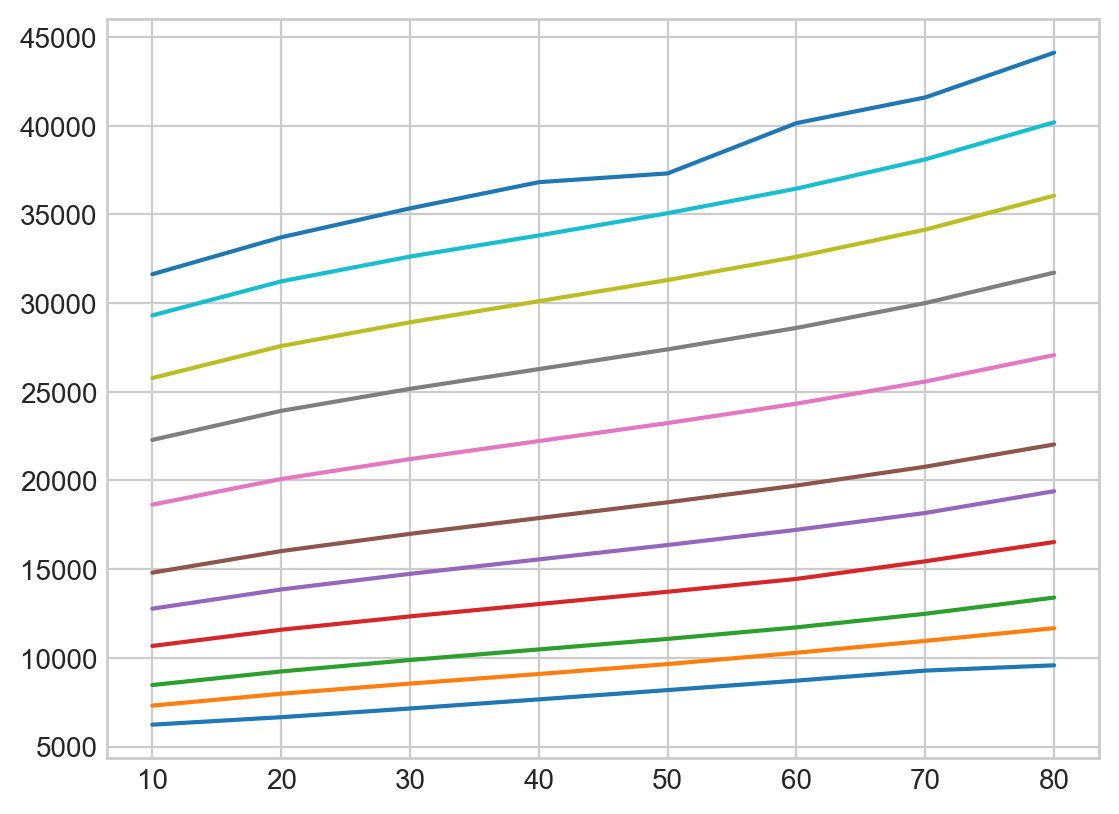

In [154]:
for i in range(len(Tc)):
    plot(CMF_list,Tc[i])

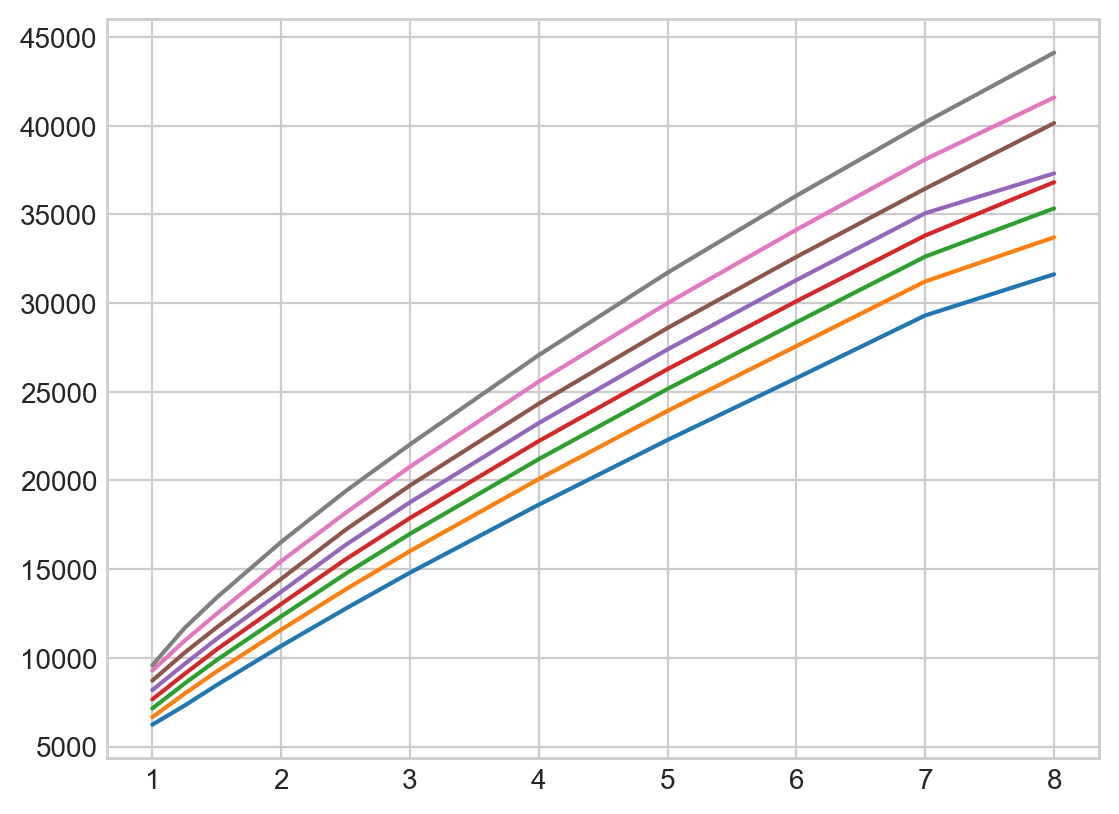

In [155]:
for i in range(len(Tc[0])):
    plot(Mpl_list,Tc[:,i])

In [40]:
save_t=[1.0]
for i in range(1,182):
    if save_t[i-1]<5000.0:
        save_t.append(save_t[i-1]+80.0)
    elif save_t[i-1]<1e8 and save_t[i-1]>=5000.0:
        save_t.append(save_t[i-1]+int(save_t[i-1]/3.0))
    elif save_t[i-1]>=1e8 and save_t[i-1]<1e9:
        save_t.append(save_t[i-1]+int(save_t[i-1]/10.0))
    else:
        save_t.append(save_t[i-1]+int(save_t[i-1]/25.0))

In [47]:
save_t_title=save_t.copy()
t_title=[]
for i in range(len(save_t)):
    if save_t[i]<100.0 and save_t[i]>1.0:
        save_t_title[i]=save_t_title[i]-1.0
    elif save_t[i]>=100.0 and save_t[i]<10000.0:
        round_value=round(save_t[i], -2)
        save_t_title[i]=round_value
    else:
        round_value=round(save_t[i], -len(str(int(save_t[i])))+2)
        save_t_title[i]=round_value

    if save_t_title[i]<1000.0:
        if save_t[i]==1.0:
            t_title.append('time: '+str(int(save_t_title[i]))+' year')
        t_title.append('time: '+str(int(save_t_title[i]))+' years')
    elif save_t_title[i]>=1000.0 and save_t_title[i]<1000000.0:
        t_title.append('time: '+str((save_t_title[i])/1000.0)+' kyr')
    elif save_t_title[i]>=1000000.0 and save_t_title[i]<1000000000.0:
        t_title.append('time: '+str((save_t_title[i])/1000000.0)+' Myr')
    elif save_t_title[i]>=1000000000.0 and save_t_title[i]<1000000000000.0:
        t_title.append('time: '+str((save_t_title[i])/1000000000.0)+' Gyr')
    st=t_title[i]
    if len(t_title[i])==11:
        t_title[i]='  '+st
    elif len(t_title[i])==12:
        t_title[i]=' '+st

In [38]:
load_file=np.loadtxt('input.txt')
results_foldername='results_Mpl'+str(load_file[0])+'_CMF'+str(load_file[1])+'_time'+str(load_file[2])+'_Qrad'+str(load_file[3])+'_'+str(load_file[4])+'_'+str(load_file[5])+'_'+str(load_file[6])+'_Teq'+str(load_file[8])


mass_profile=np.loadtxt(results_foldername+'/profile/t0/structure0.txt')
mass=mass_profile[:,8]

s=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[0]))+'.txt')
T_max=max(s[:,4])#+max(s[:,4])*0.01
R_max=max(s[:,0])#+max(s[:,0])*0.01
rho_min=min(s[:,2])
Fconv_max=(max(s[:,7][5:-2])*5.0#+max(s[:,7][5:-2])*0.01)
s=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[-1]))+'.txt')
T_min=min(s[:,4])*0.9#-50.0
P_max=(max(s[:,1])/1e9)*1.05#+max(s[:,1])/1e11
P_min=-1.0
rho_max=max(s[:,2])+max(s[:,2])*0.01
g_max=max(s[:,3])+max(s[:,3])*0.01
eta_max=max(s[:,12])+max(s[:,12])*0.01
s=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[1]))+'.txt')
Rem_max=max(s[:,11])*5.0#+max(s[:,11])*0.01
vconv_max=max(s[:,10][5:-2])*5.0#+max(s[:,10][5:-2])*0.01


In [42]:
s0=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[0]))+'.txt')
sE=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[-1]))+'.txt')

In [51]:
def f_axis_max_min(v_min,v_max,axis_scale):
    if plot_scale=='log':
        v_max=np.log10(v_max)
        v_min=np.log10(v_min)
        dv=np.abs(v_max-v_min)
        v_max=10.0**(v_max+dv)
        v_min=10.0**(v_min-dv)
    else:
        dv=np.abs(v_max-v_min)
        v_max=v_max+dv
        v_min=v_min-dv
    return v_min,v_max

Text(0.5, 0, 'Mass ($M_{\\oplus}$)')

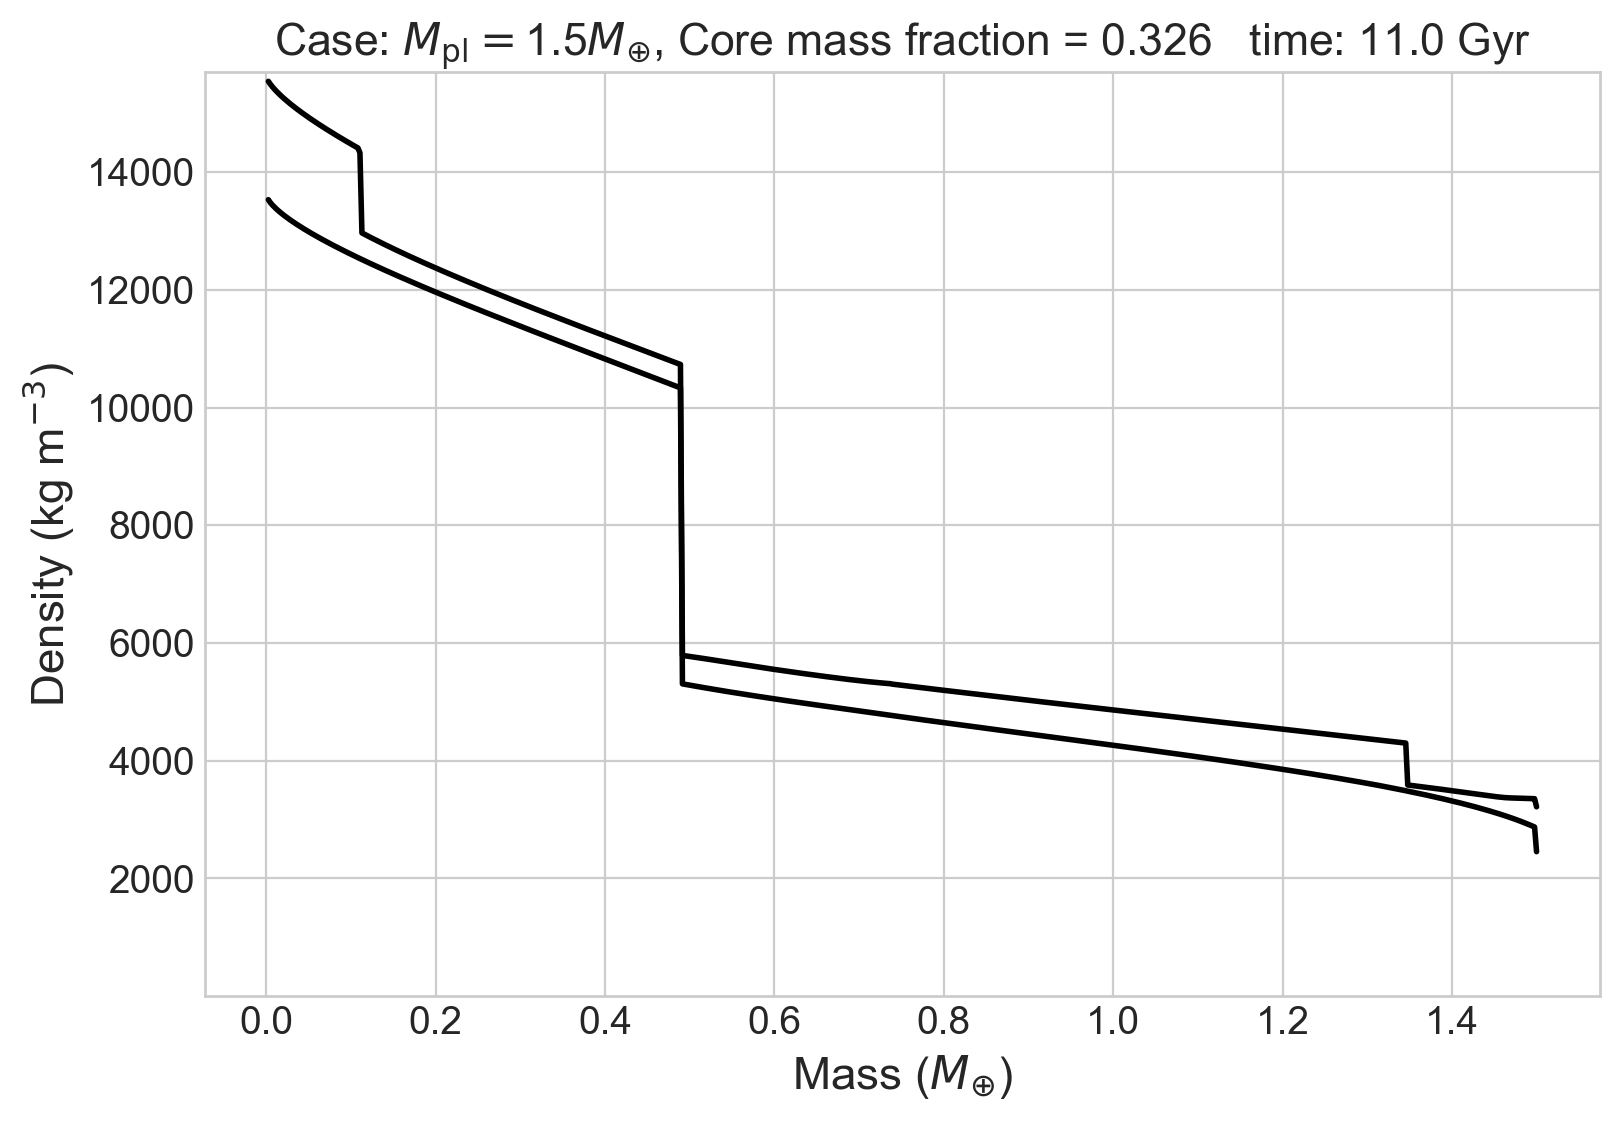

In [49]:
plt.figure(figsize=(9,6))
axis_scale='linear'
plt.plot(mass/5.972e24,s0[:,2],color='black',linewidth=2.0)
plt.plot(mass/5.972e24,sE[:,2],color='black',linewidth=2.0)
y_ni
plt.ylim(0.01,rho_max)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Case: '+r'$M_{\mathrm{pl}}= $'+str(load_file[0])+r'$ M_{\oplus}$, Core mass fraction = '+str(load_file[1])+'   '+t_title[i] ,fontsize=16)
plt.ylabel(r'Density (kg m$^{-3}$)',fontsize=16.5)
plt.xlabel(r'Mass ($M_{\oplus}$)',fontsize=16.5)


In [183]:
evo=np.loadtxt(results_foldername+'/evolution_old.txt')

Text(0.5, 1.0, '$M_{\\mathrm{pl}}= $1.5$ M_{\\oplus}$, Core mass fraction = 0.326')

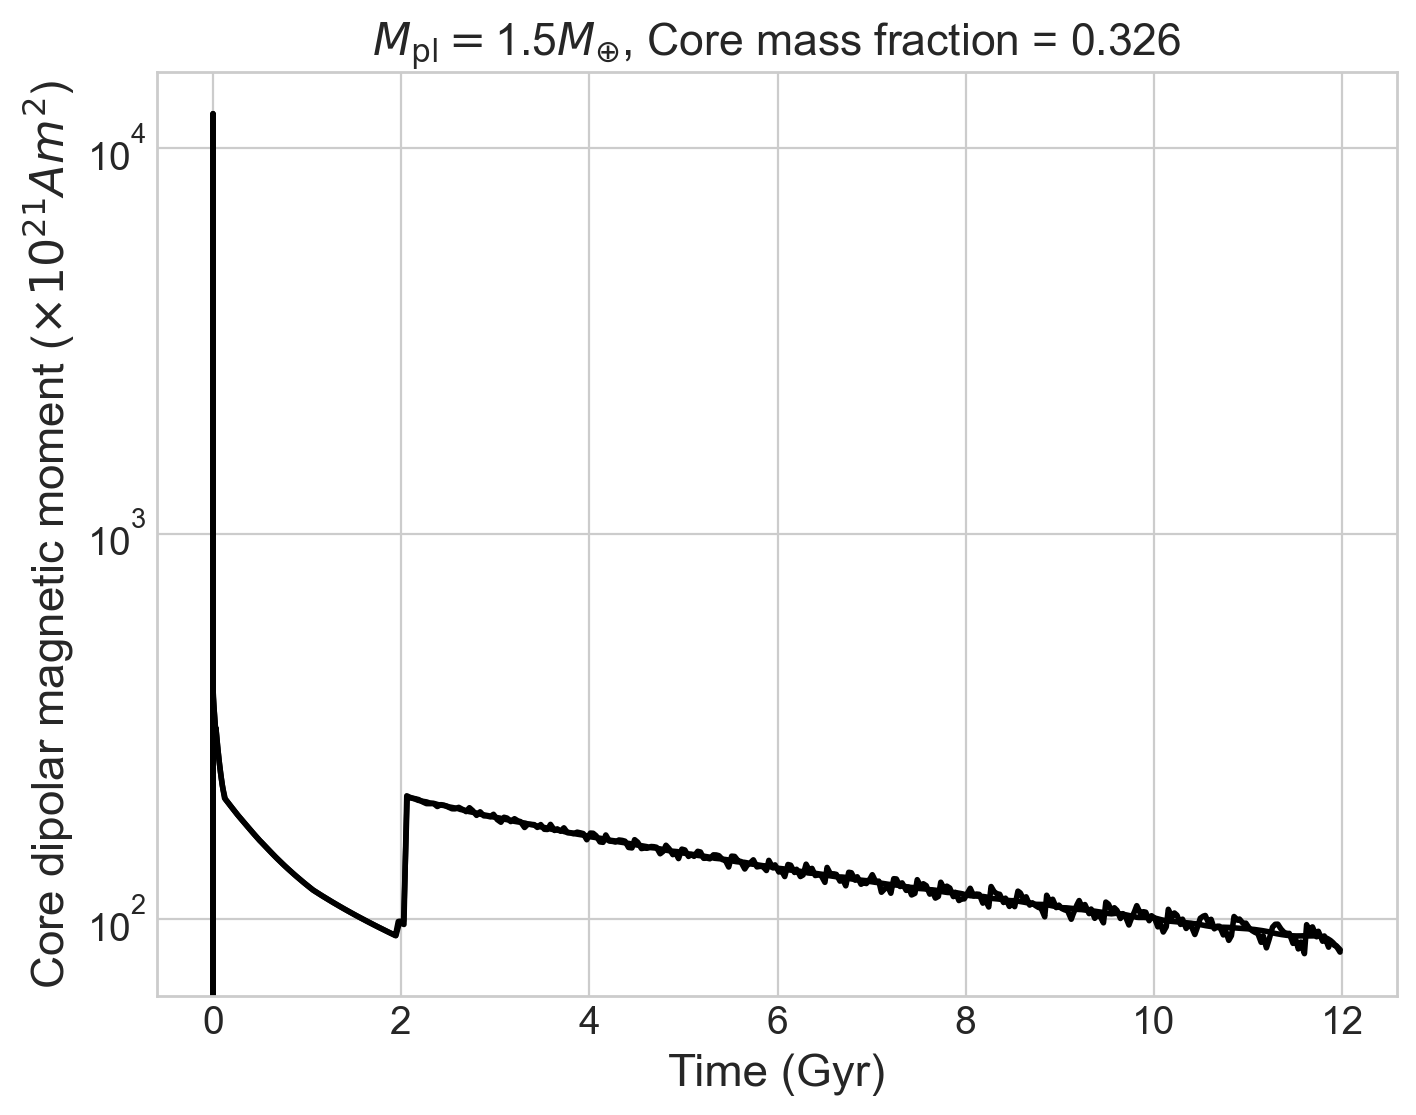

In [184]:
plt.figure(figsize=(8,6))
plt.plot(evo[:,0]/1e9/86400.0/365.0,evo[:,22]/1e21,color='black',linewidth=2.0)
plt.plot(evp[:,0]/1e9/86400.0/365.0,evp[:,22]/1e21,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.yscale('log')
plt.ylabel(r'Core dipolar magnetic moment ($\times 10^{21} Am^2$)',fontsize=16.5)
plt.xlabel('Time (Gyr)',fontsize=16.5)
plt.title(r'$M_{\mathrm{pl}}= $'+str(load_file[0])+r'$ M_{\oplus}$, Core mass fraction = '+str(load_file[1]) ,fontsize=16)

In [147]:
from scipy.signal import savgol_filter

# Sample data
x = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Apply the filter
y = savgol_filter(x, window_length=5, polyorder=2) 

print(y)


[1.         2.         3.         4.17142857 4.65714286 4.17142857
 3.         2.         1.        ]


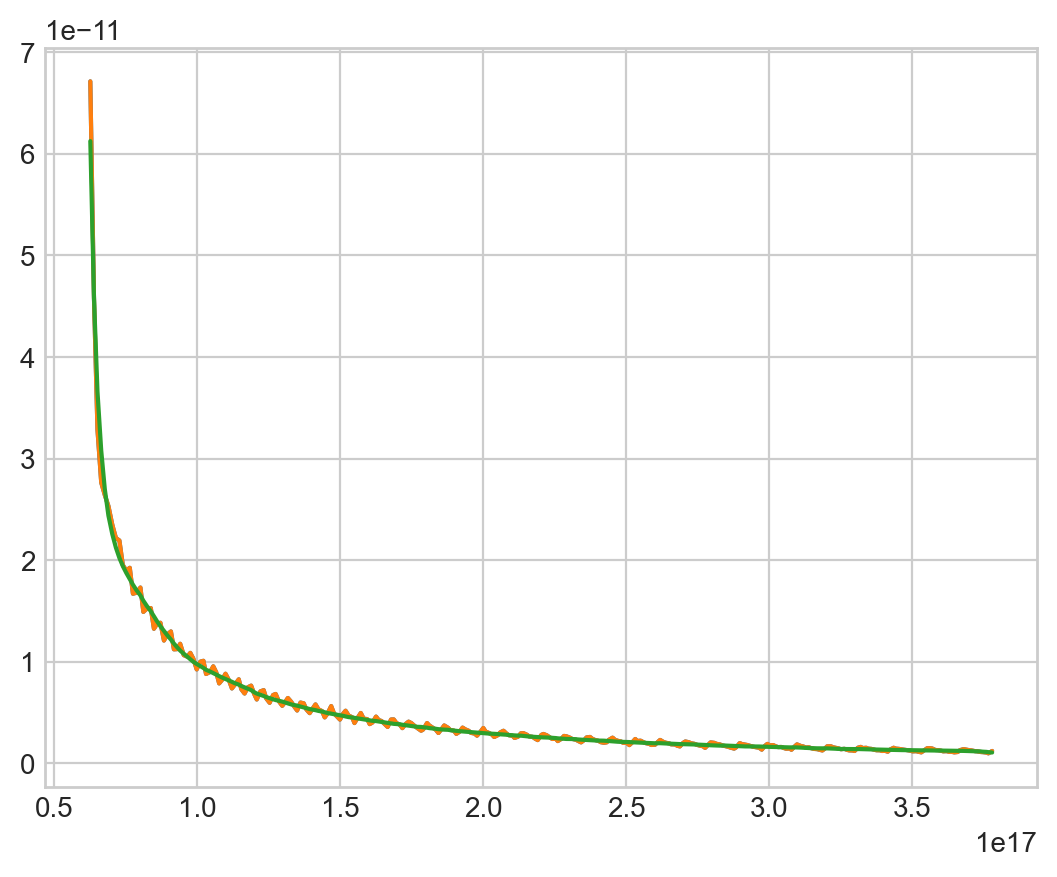

In [169]:
#plt.yscale('log')
Ric_t=CubicSpline(evo[:,0][start_ind:].tolist(),evo[:,14][start_ind:].tolist())
dRicdt=Ric_t.derivative()
plot(evo[:,0][start_ind:],dRicdt(evo[:,0][start_ind:]))
y=np.log10((dRicdt(evo[:,0][start_ind:])).tolist())
y_hat=savgol_filter(y.tolist(), window_length=99,polyorder=9) 
plot(evo[:,0][start_ind:],10.0**y)
plot(evo[:,0][start_ind:],10.0**y_hat)

In [172]:
(Ric.tolist()).copy()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [171]:
Ric

array([      0.        ,       0.        ,       0.        , ...,
       2241998.44089285, 2242648.1914787 , 2244024.6891484 ])

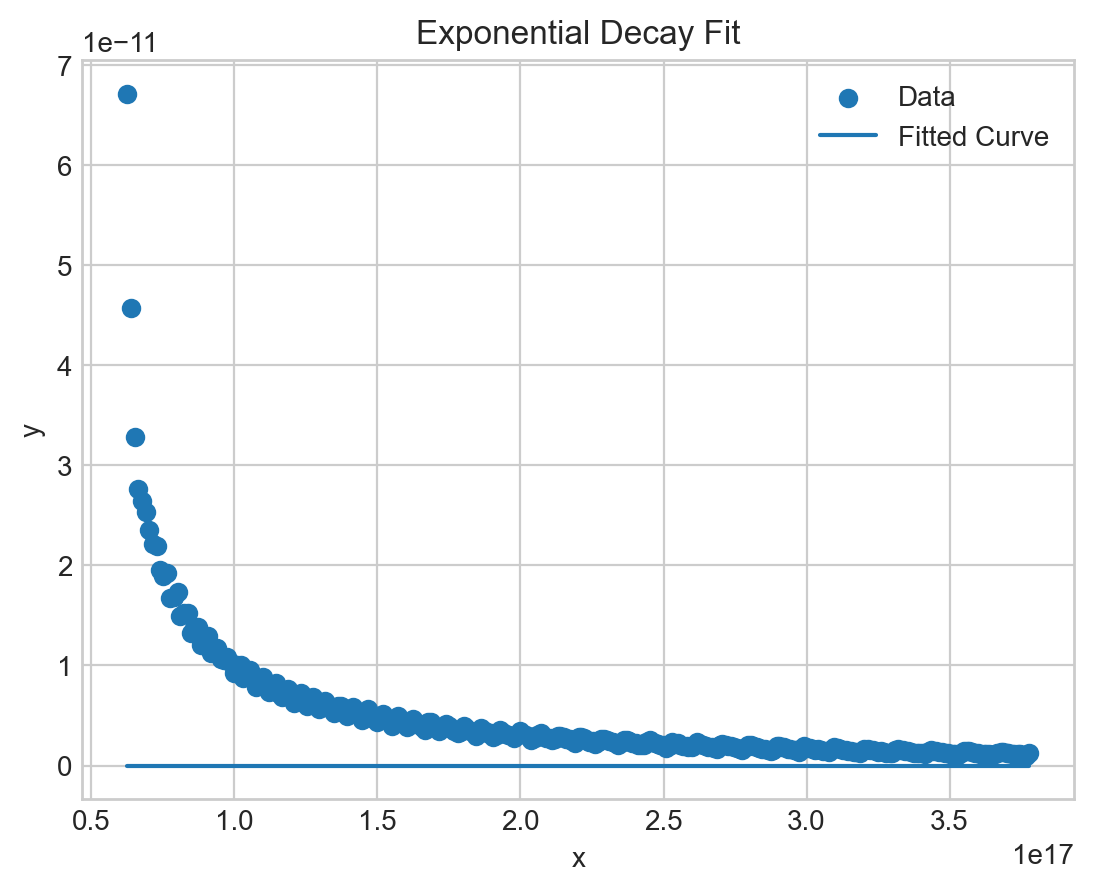

Optimal parameters: a=1.00, b=1.00


In [141]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the exponential decay function
# a is the initial amount, b is the decay constant

def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# Example data
x_data = (evo[:,0][start_ind:]/86400.0/365.0/1e9).copy()
y_data = dRicdt(x_data).copy()

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exponential_decay, x_data, y_data)

# Obtain the optimal parameters
a_opt, b_opt = popt

# Plot the original data
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted curve
x_fit = x_data.copy()
y_fit = exponential_decay(x_fit, a_opt, b_opt)
plt.plot(x_fit, y_fit, label='Fitted Curve')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Exponential Decay Fit')

# Show plot
plt.show()

# Print the optimal parameters
print(f"Optimal parameters: a={a_opt:.2f}, b={b_opt:.2f}")


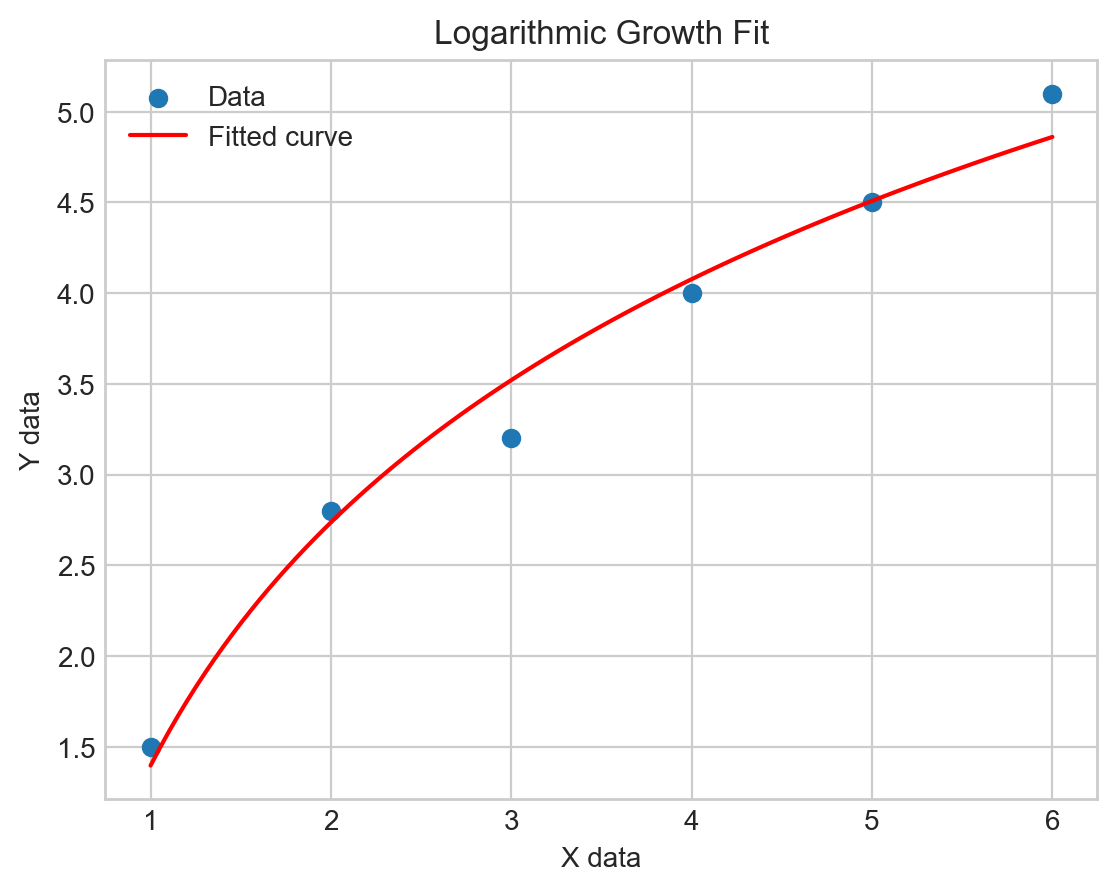

In [137]:
from scipy.optimize import curve_fit

# Define the logarithmic growth function
def log_growth(x, a, b):
    return a * np.log(b * x)

# Sample data
data_x = np.array([1, 2, 3, 4, 5, 6])  # Independent variable
data_y = np.array([1.5, 2.8, 3.2, 4.0, 4.5, 5.1])  # Dependent variable

# Perform curve fitting
params, covariance = curve_fit(log_growth, data_x, data_y)#, p0=[1, 1])

# Extract the optimal parameters
a_opt, b_opt = params

# Generate fit line
fit_x = np.linspace(1, 6, 100)
fit_y = log_growth(fit_x, a_opt, b_opt)

# Plot the data and the fitted curve
plt.scatter(data_x, data_y, label='Data')
plt.plot(fit_x, fit_y, color='red', label='Fitted curve')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.title('Logarithmic Growth Fit')
plt.legend()
plt.show()


In [135]:
x_data.size

50

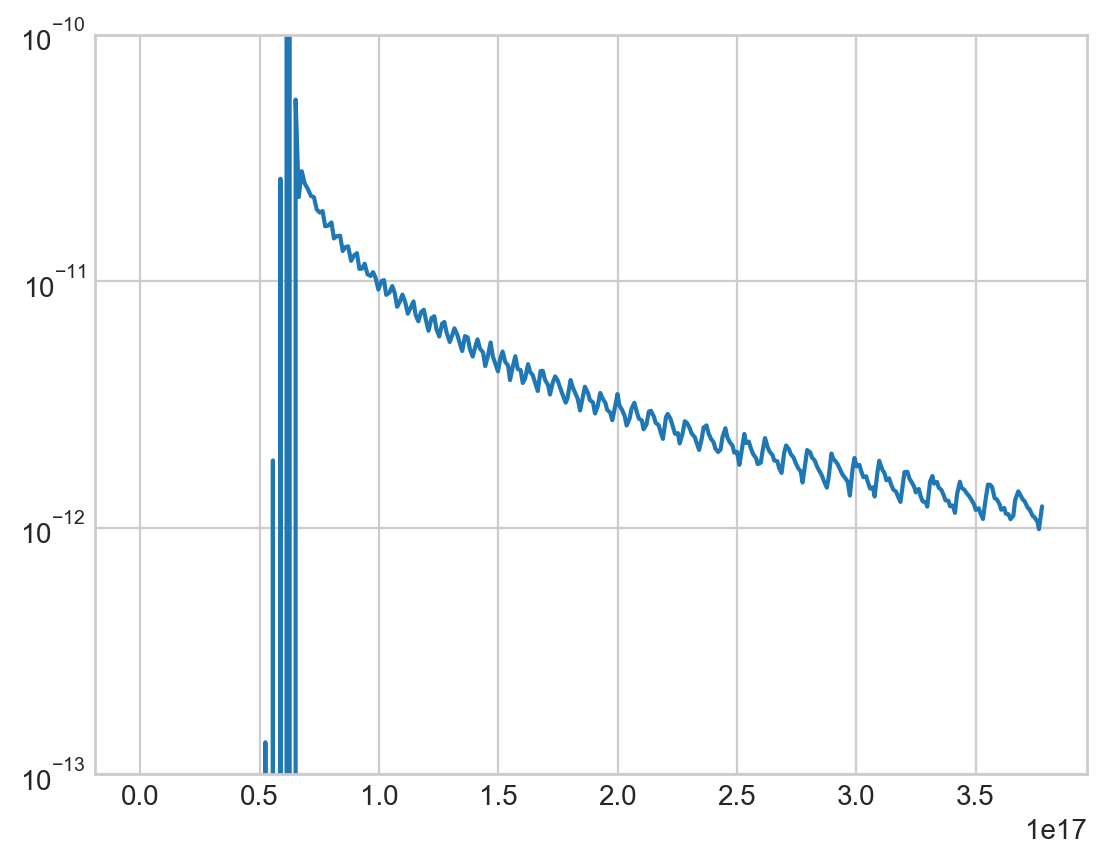

In [88]:
plt.yscale('log')
plt.ylim(1e-13,1e-10)
plot(evo[:,0],dRicdt(evo[:,0]))

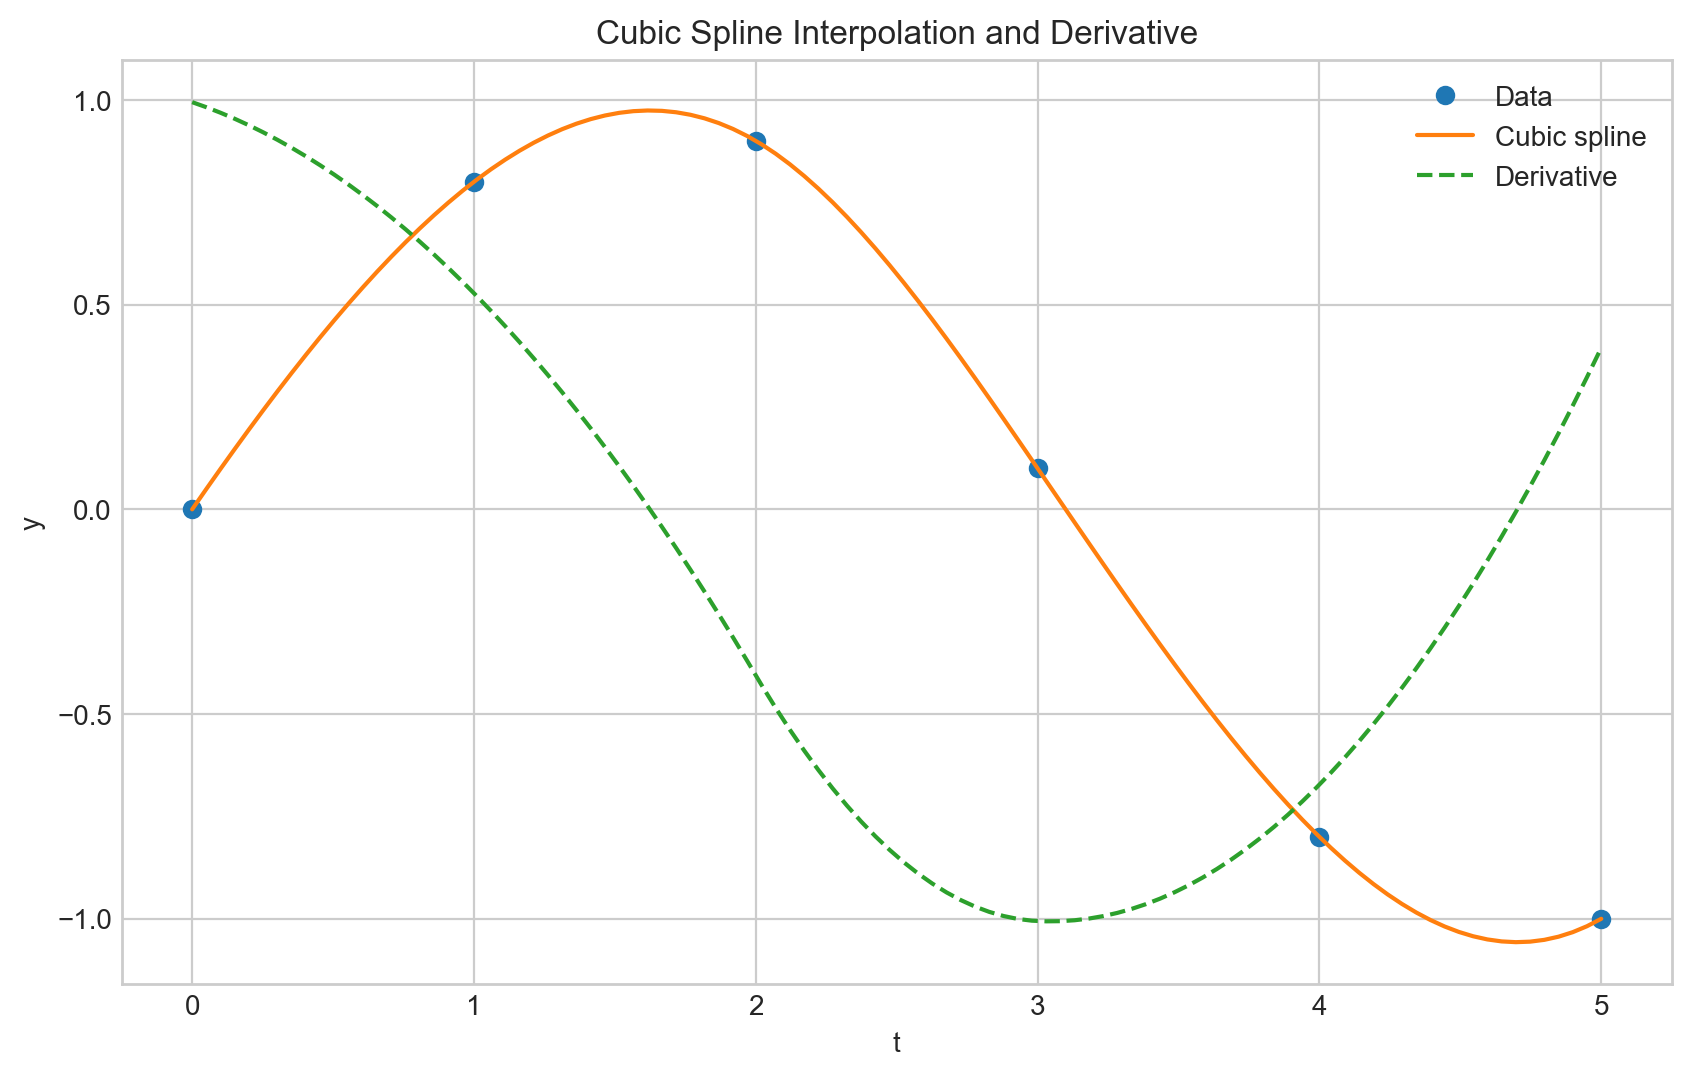

In [78]:

# Sample data
t = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1])

# Perform cubic spline interpolation
spline = CubicSpline(t, y)

# Calculate the derivative of the cubic spline
spline_derivative = spline.derivative()

# Generate points for plotting
t_fine = np.linspace(t[0], t[-1], 100)

# Plot the original data, the spline, and its derivative
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'o', label='Data')
plt.plot(t_fine, spline(t_fine), label='Cubic spline')
plt.plot(t_fine, spline_derivative(t_fine), '--', label='Derivative')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation and Derivative')
plt.show()


In [54]:
dt_arr=evo[:,0][1:]-evo[:,0][:-1]

In [59]:
dRic_arr=evo[:,14][1:]-evo[:,14][:-1]

In [68]:
dRicdt_arr=dRic_arr/dt_arr

In [69]:
dRicdt_arr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.12139815e-12, 1.01067307e-12, 1.05993087e-12])

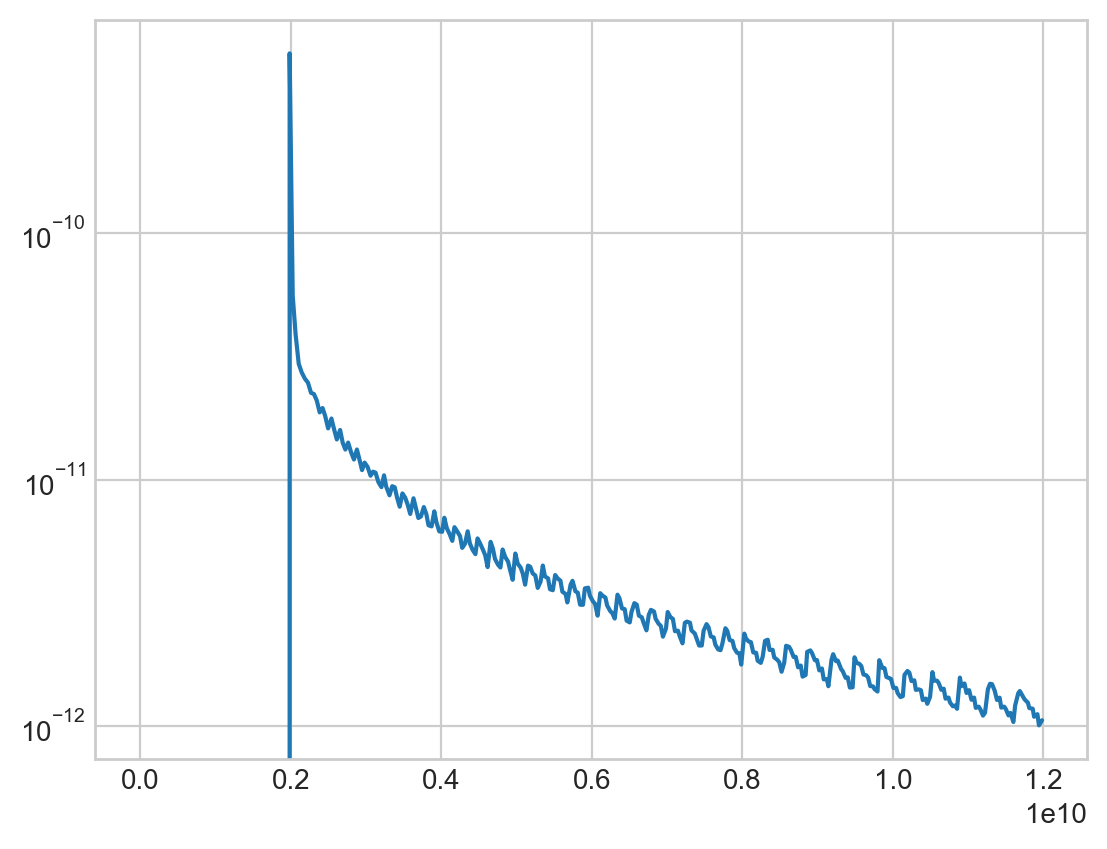

In [66]:
plt.yscale('log')
plot(evo[:,0][1:]/86400.0/365.0,dRicdt_arr)

In [75]:
temp_arr=dRicdt_arr.copy()
for i in range(0,len(evo[:,1])-1):
    if dRicdt_arr[i]!=0.0:
        temp_arr[i]=evo[:,22][i]/1e21/dRicdt_arr[i-1]


/var/folders/tw/zmm3b0k97wbfj0cl53y3w2nm0000gn/T/ipykernel_63347/4110002321.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  temp_arr[i]=evo[:,22][i]/1e21/dRicdt_arr[i-1]


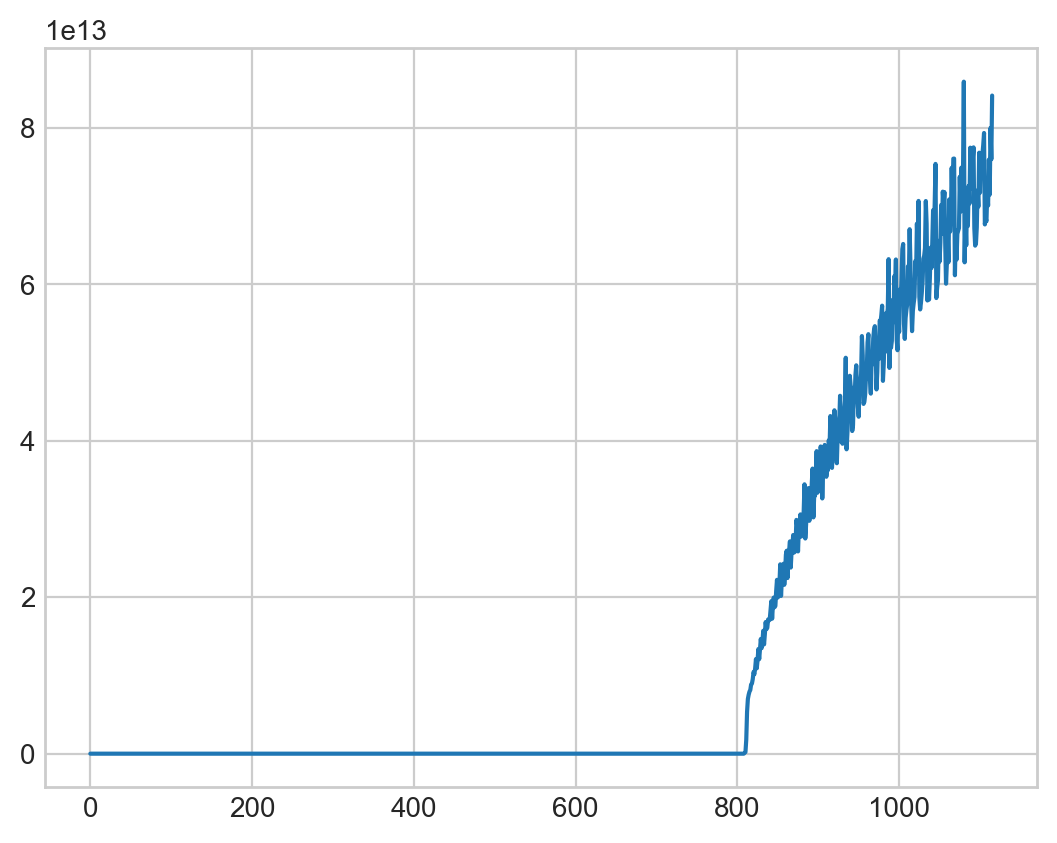

In [76]:
plot(temp_arr)

In [252]:
## I use the next two cells to figure out how to speed up plotting.

import matplotlib.style as mplstyle
import time

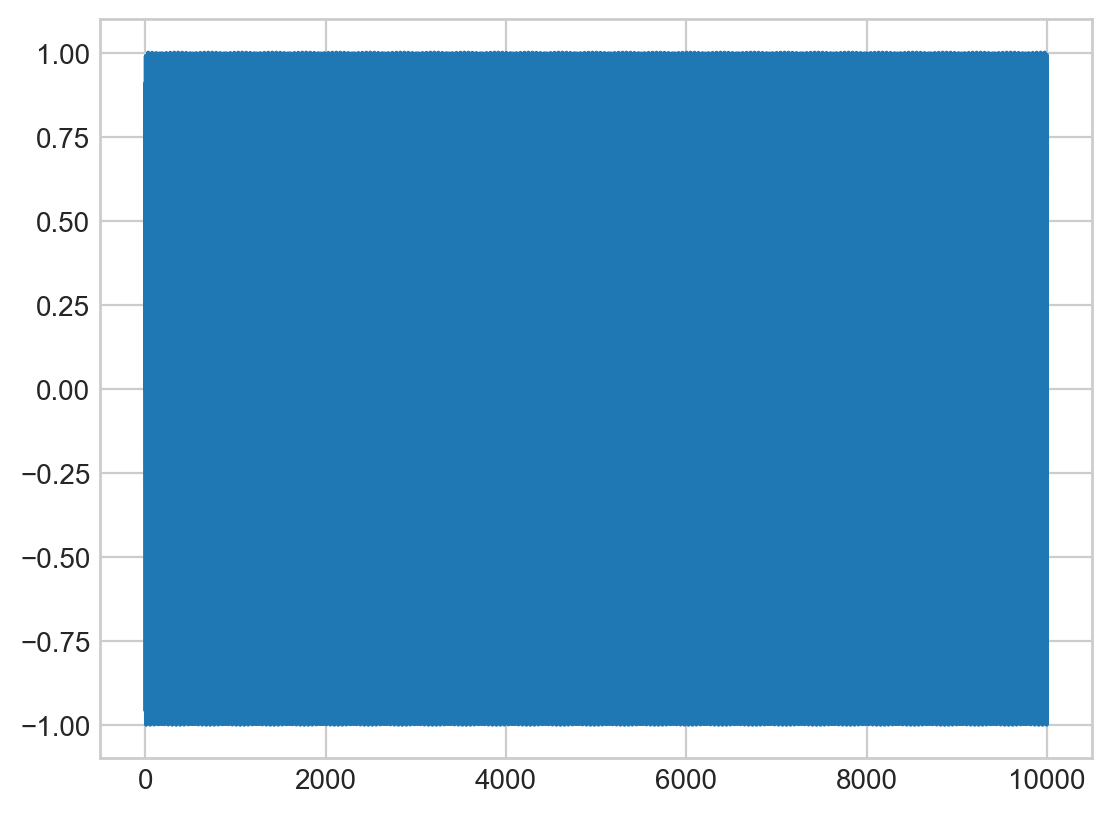

In [250]:
x = np.arange(0, 10000, 1)
y = np.sin(x)

while i
# Plot the data
plt.plot(x, y)


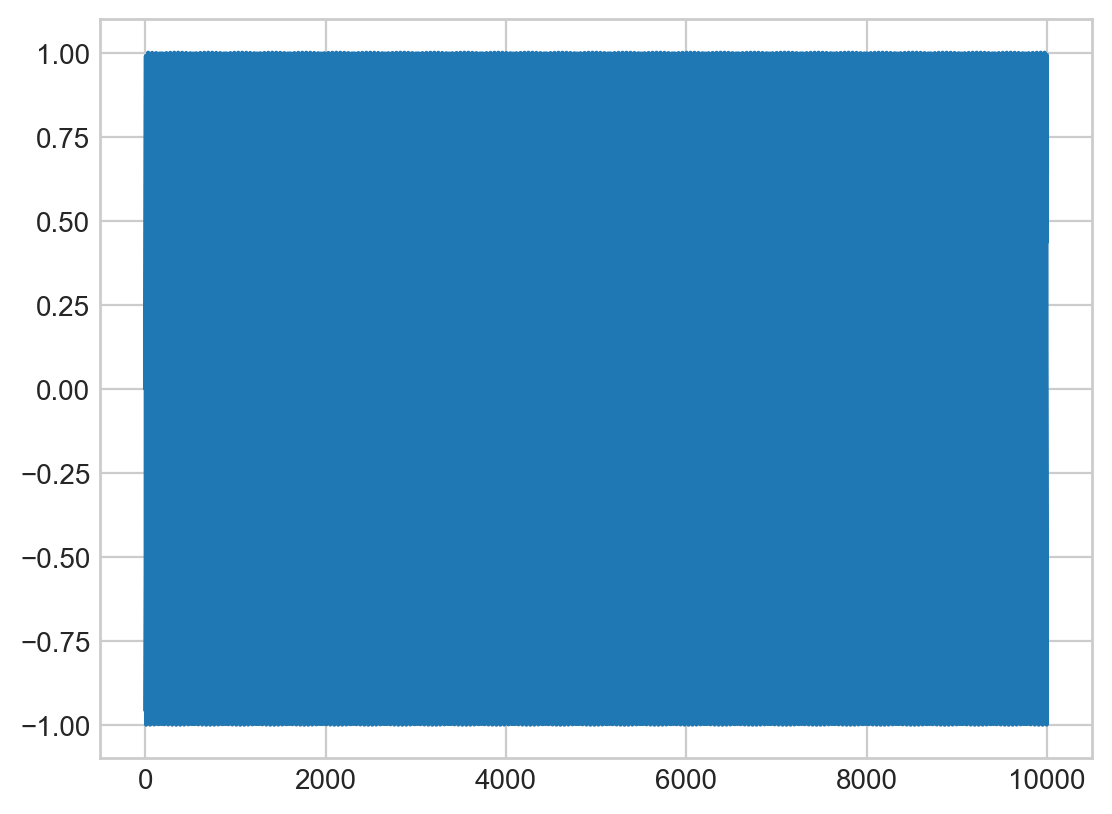

In [251]:
mplstyle.use('fast')
plt.plot(x, y)

In [4]:
evo=np.loadtxt('results/evolution.txt')
# index  variable  #### everything is in SI units
# 0       t
# 1       dt
# 2       average mantle specific entropy
# 3       average mantle temperature
# 4       average core temperature 
# 5       surface temperature
# 6       core mantle boundary (CMB) temperature
# 7       surface heat flux
# 8       CMB flux
# 9       Conductive flux along core adiabat (threshold flux for thermal convection in liquid core)
# 10      Planet radius
# 11      Core radius
# 12      Central pressure
# 13      CMB pressure

## pick values for i_x and i_y in the following boxes to set x and y-axis to plot thermal history of the planet

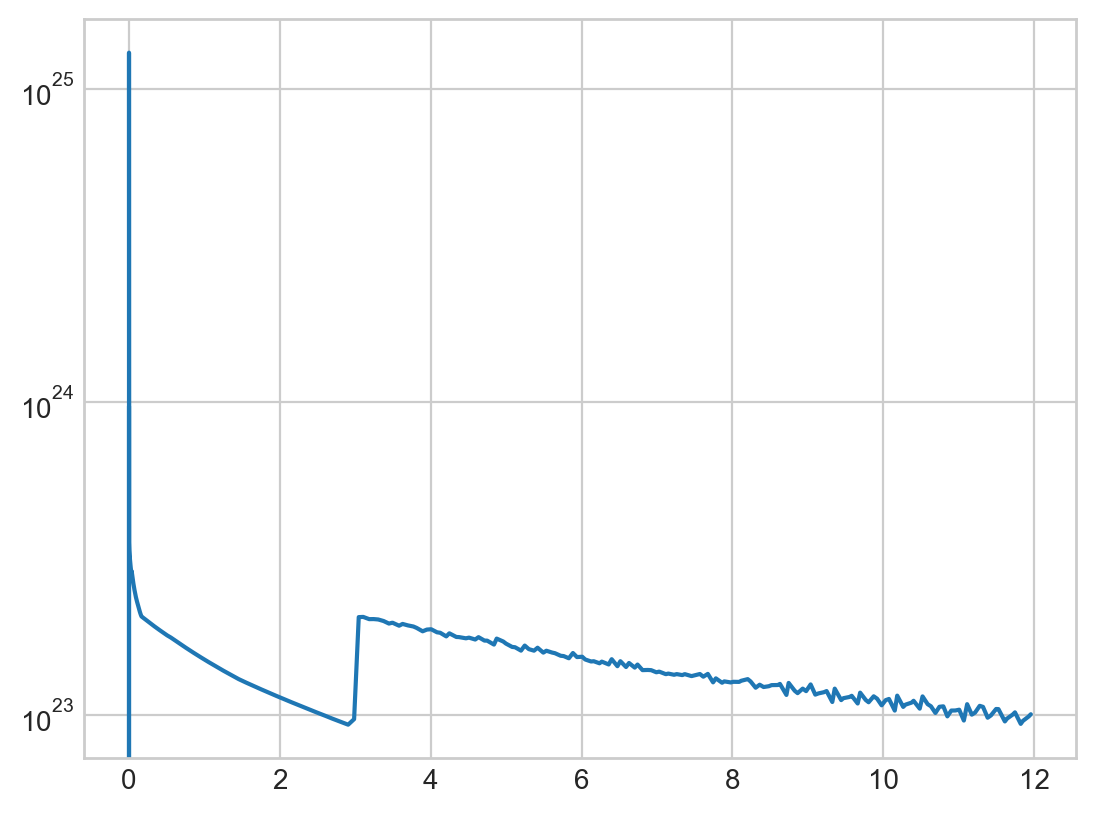

In [6]:
i_x=0
i_y=-1
plt.yscale('log')
plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y])

Text(0.5, 0, 'Gyr')

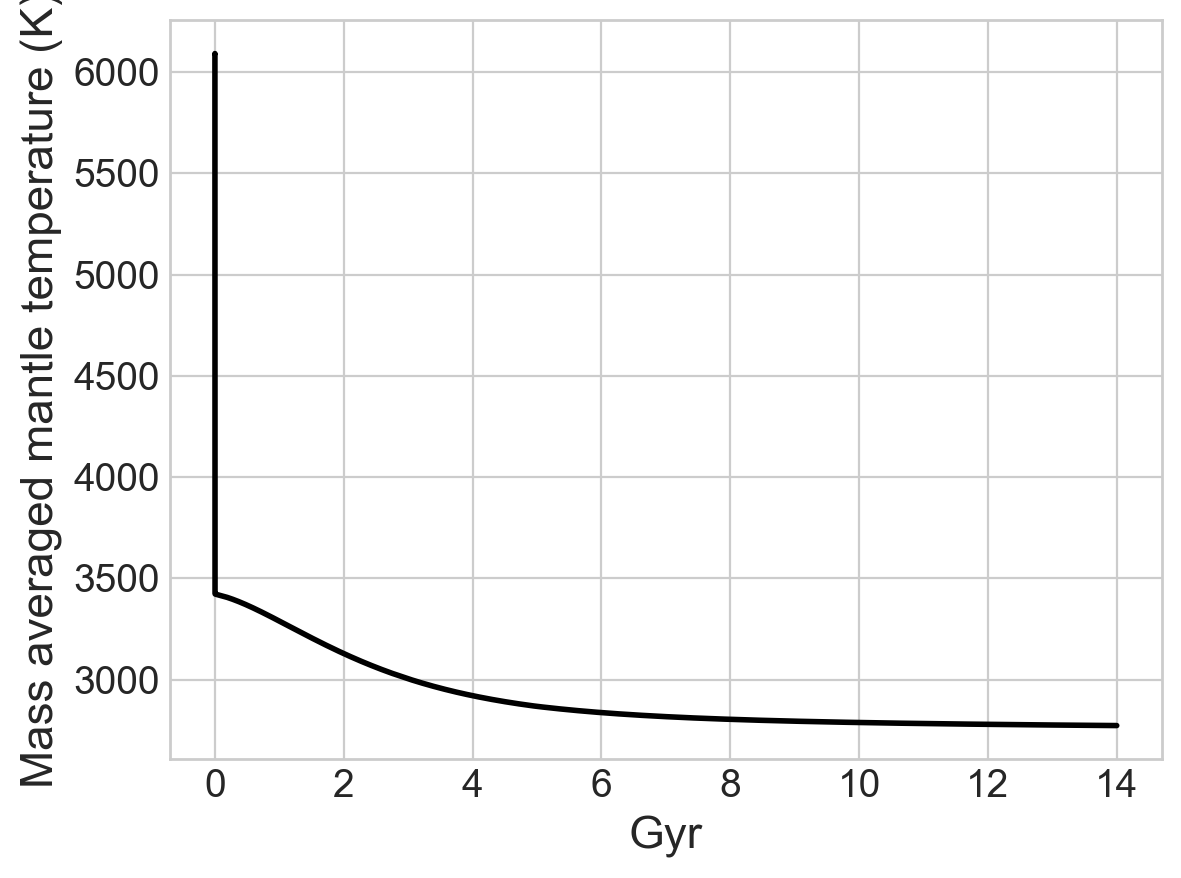

In [6]:
i_x=0
i_y=3
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Mass averaged mantle temperature (K)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

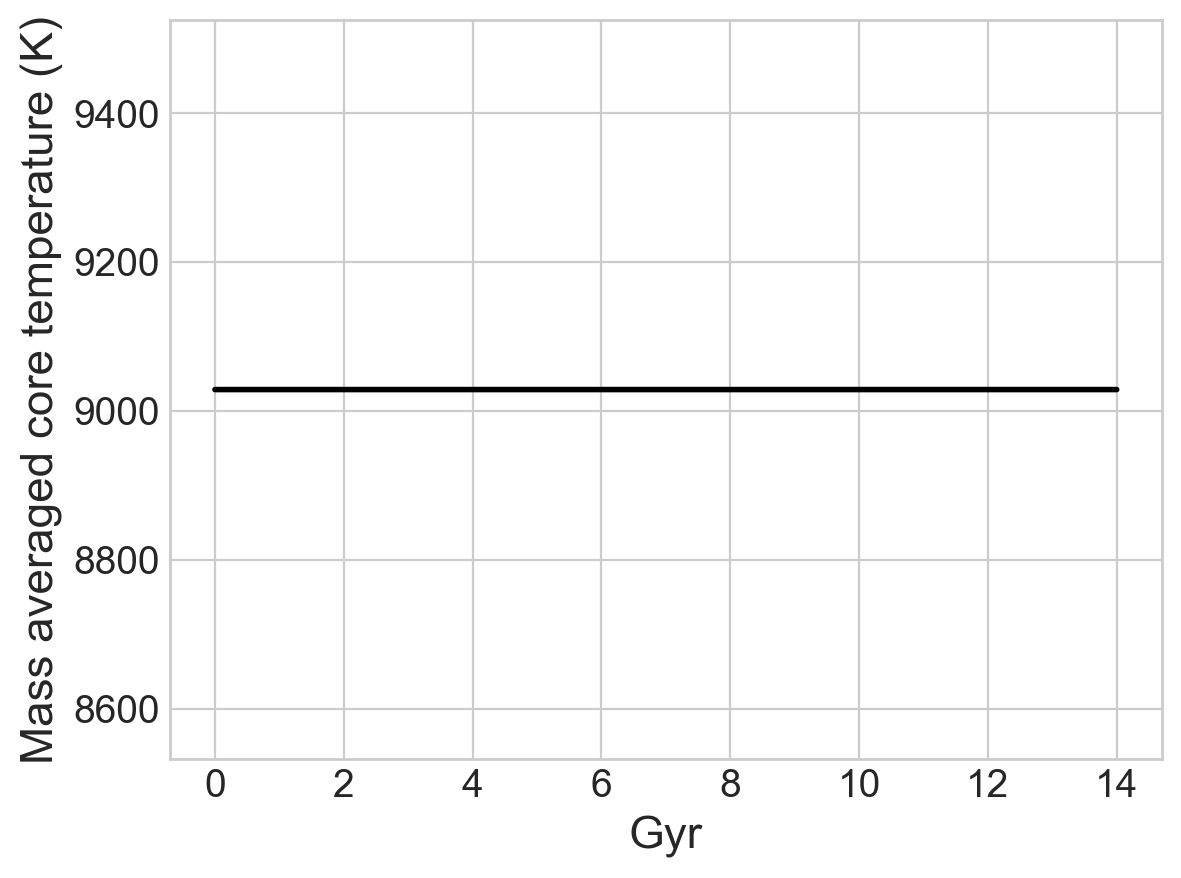

In [7]:
i_x=0
i_y=4
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Mass averaged core temperature (K)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

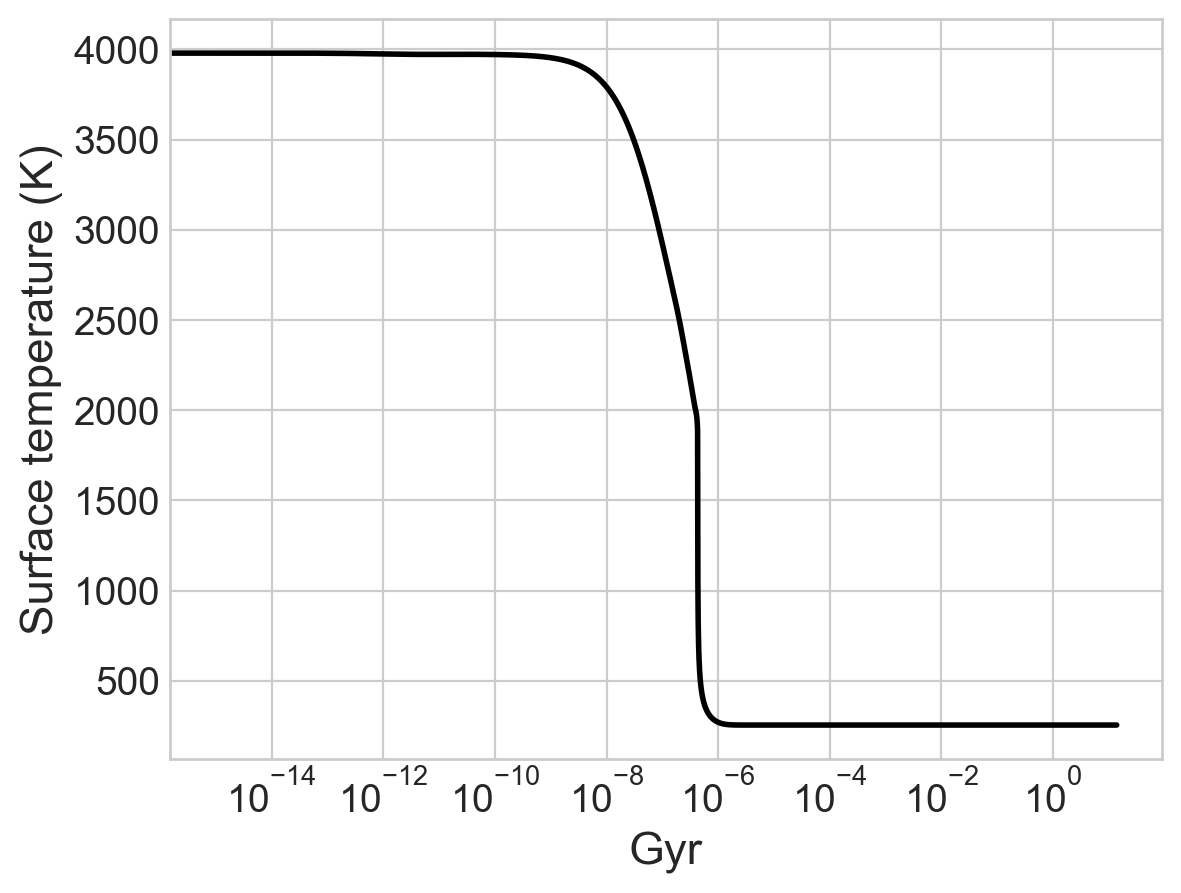

In [48]:
i_x=0
i_y=5
plt.xscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Surface temperature (K)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

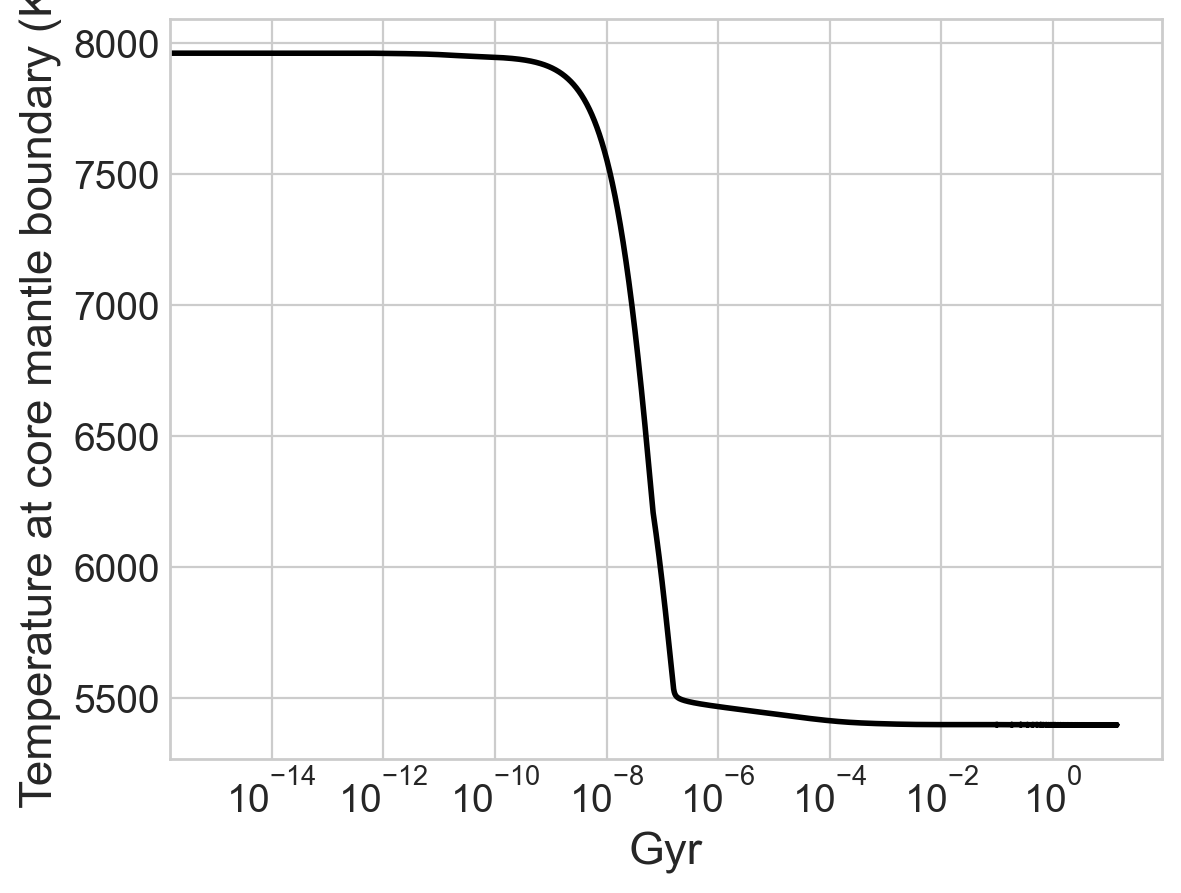

In [12]:
i_x=0
i_y=6
plt.xscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Temperature at core mantle boundary (K)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

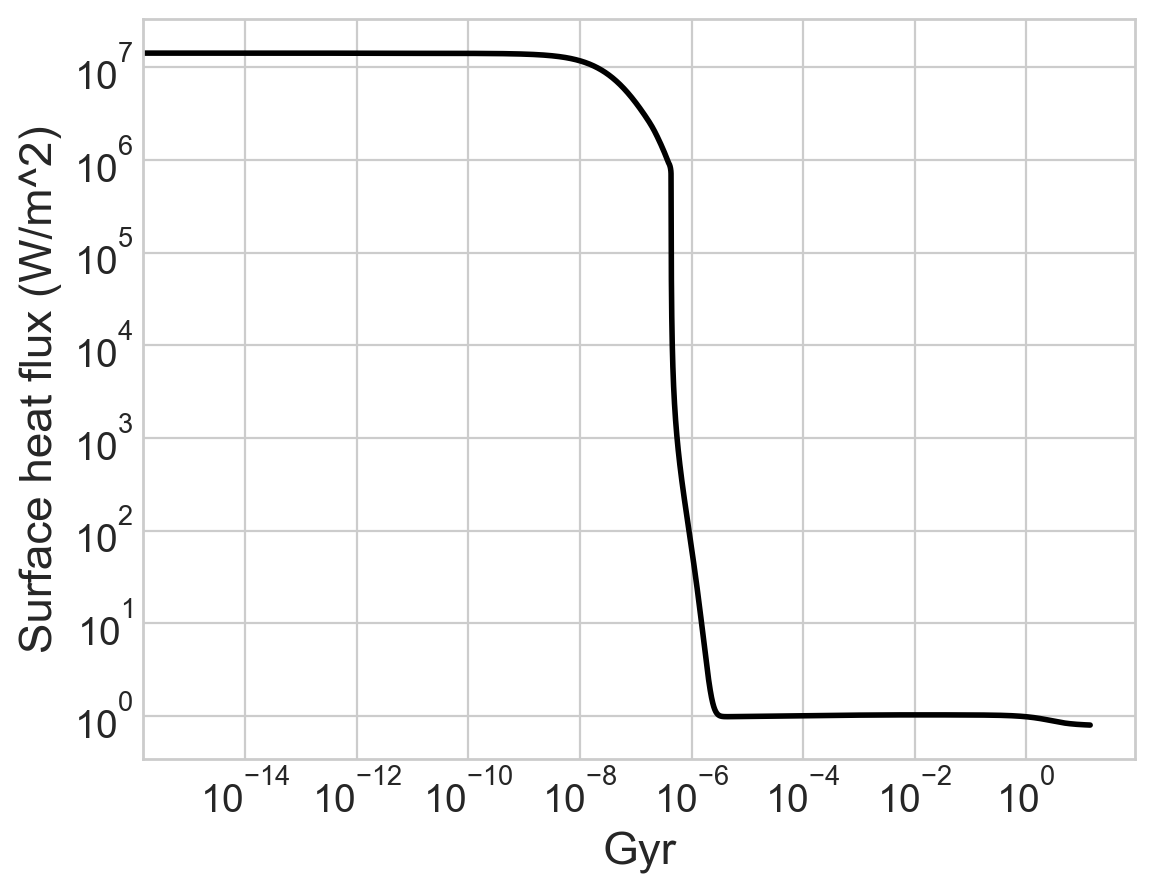

In [16]:
i_x=0
i_y=7
plt.xscale('log')
plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Surface heat flux (W/m^2)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

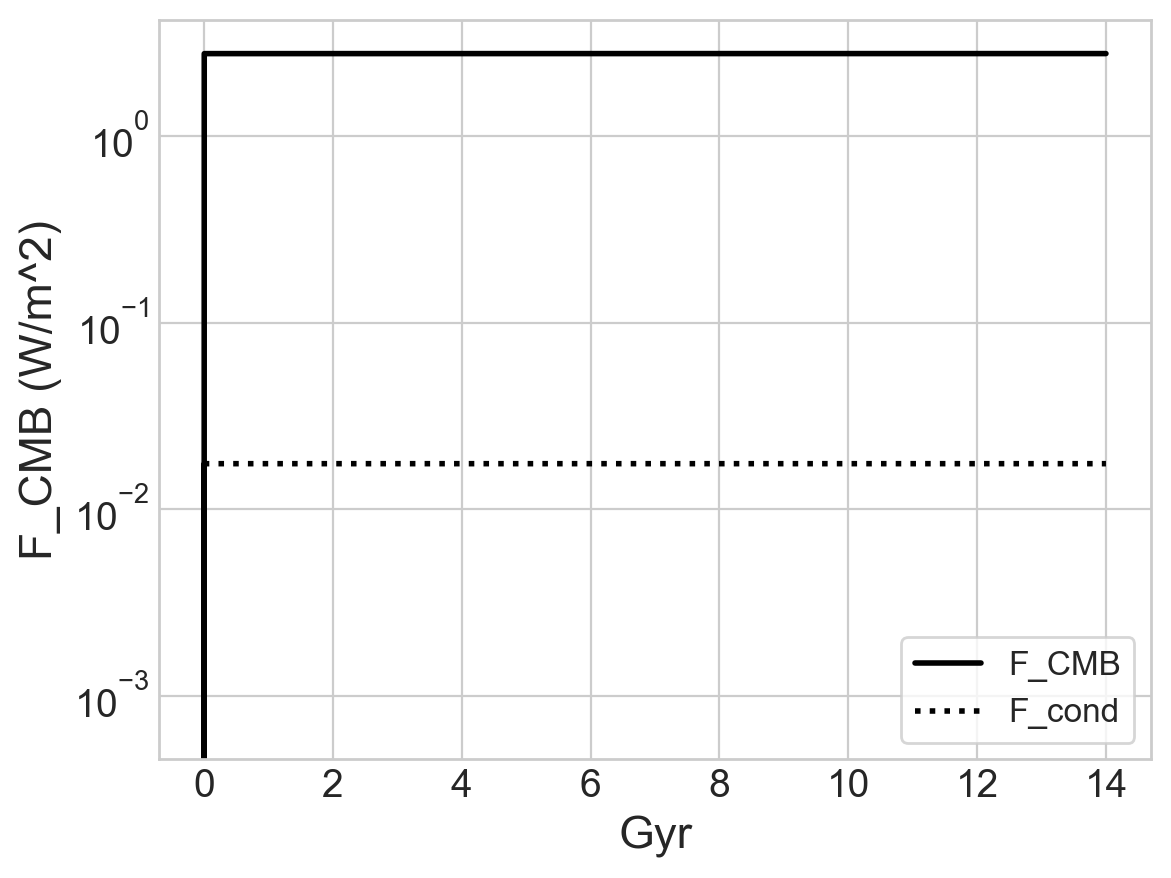

In [19]:
i_x=0
i_y=8
plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0,label='F_CMB')
i_y=9
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0,linestyle=':',label='F_cond')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('F_CMB (W/m^2)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 
plt.legend(frameon=True, fontsize=12)

Text(0.5, 0, 'Gyr')

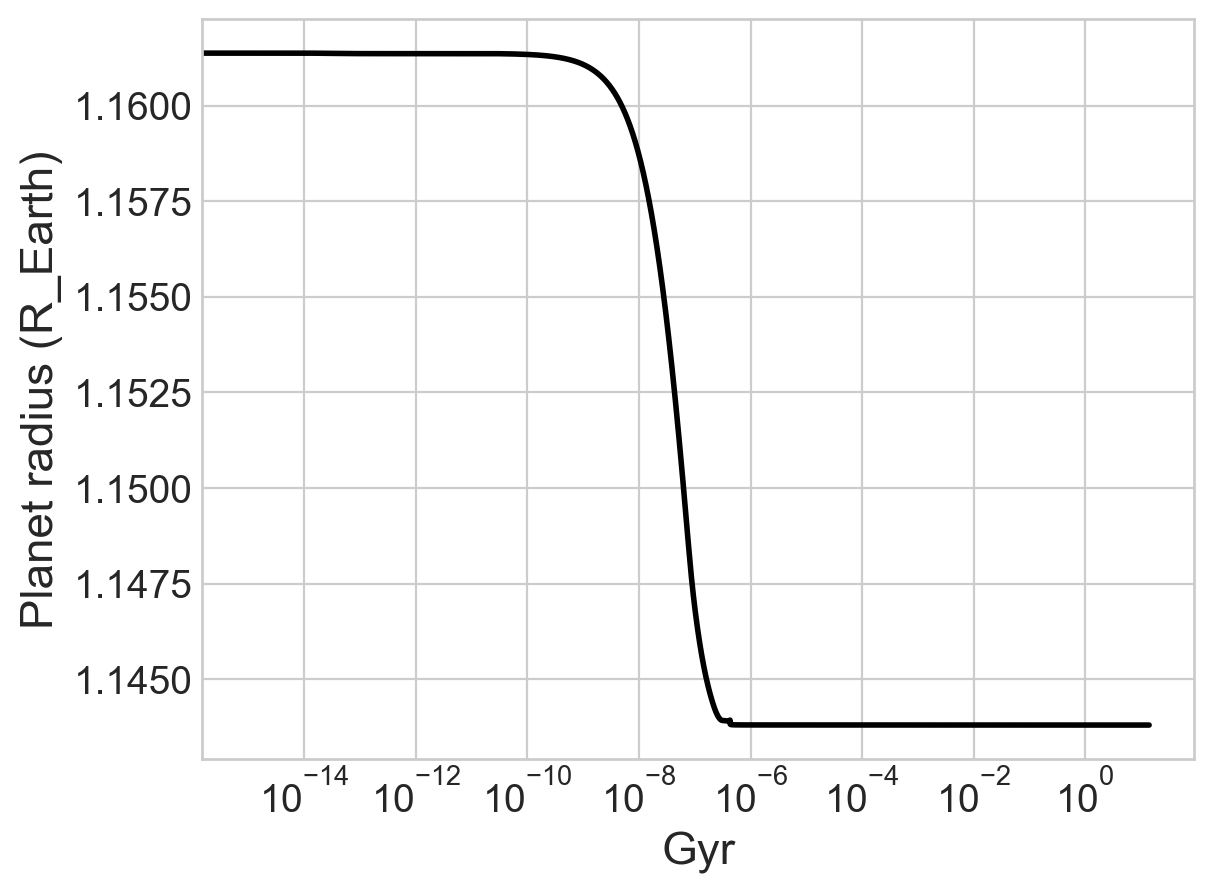

In [21]:
i_x=0
i_y=10
plt.xscale('log')
#plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y]/6371000.0,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Planet radius (R_Earth)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

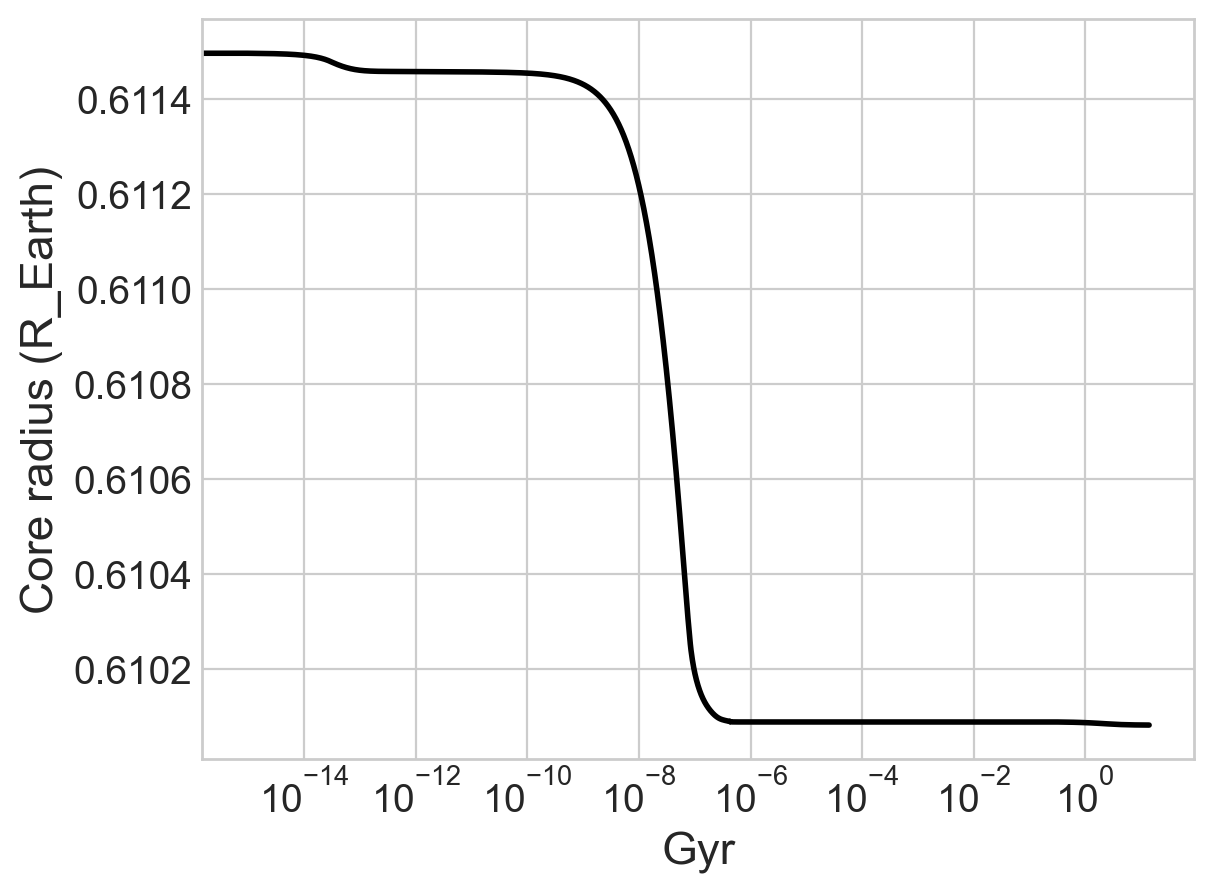

In [22]:
i_x=0
i_y=11
plt.xscale('log')
#plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y]/6371000.0,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Core radius (R_Earth)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

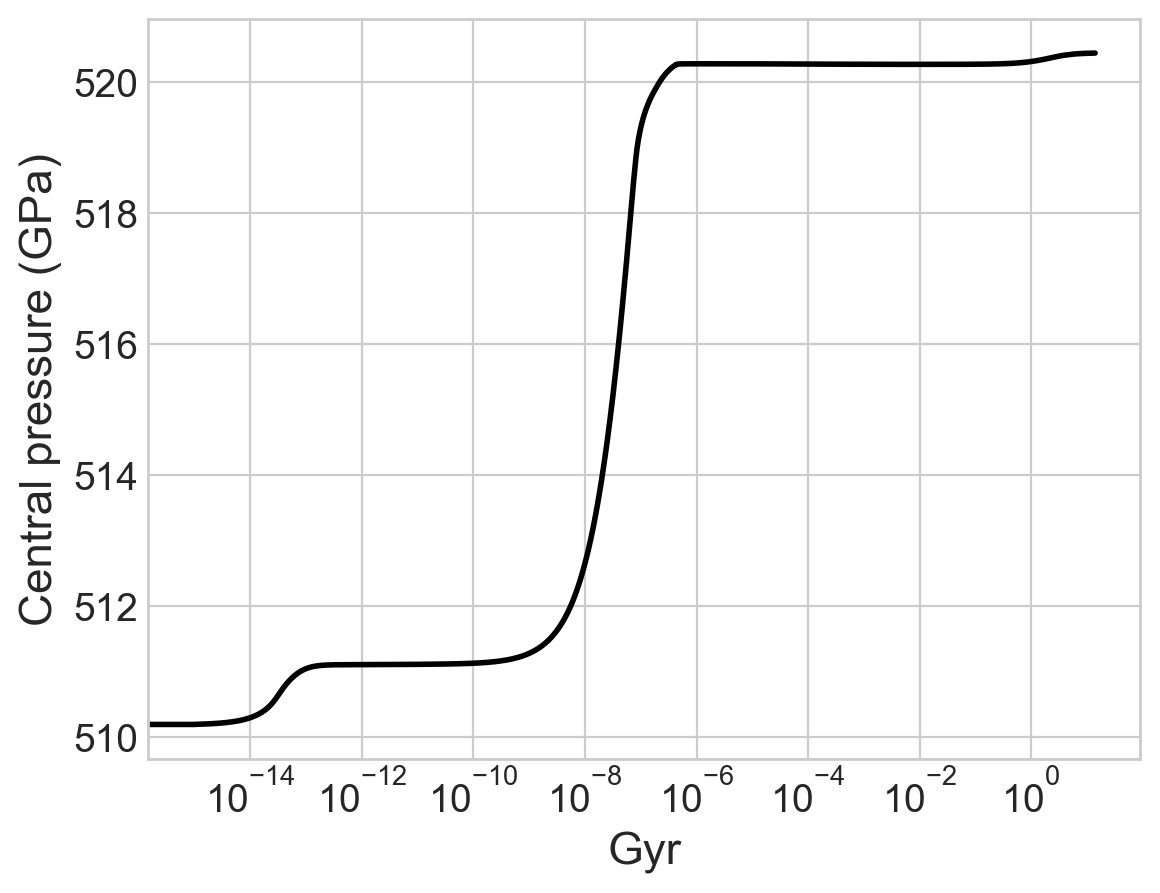

In [23]:
i_x=0
i_y=12
plt.xscale('log')
#plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y]/1e9,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Central pressure (GPa)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

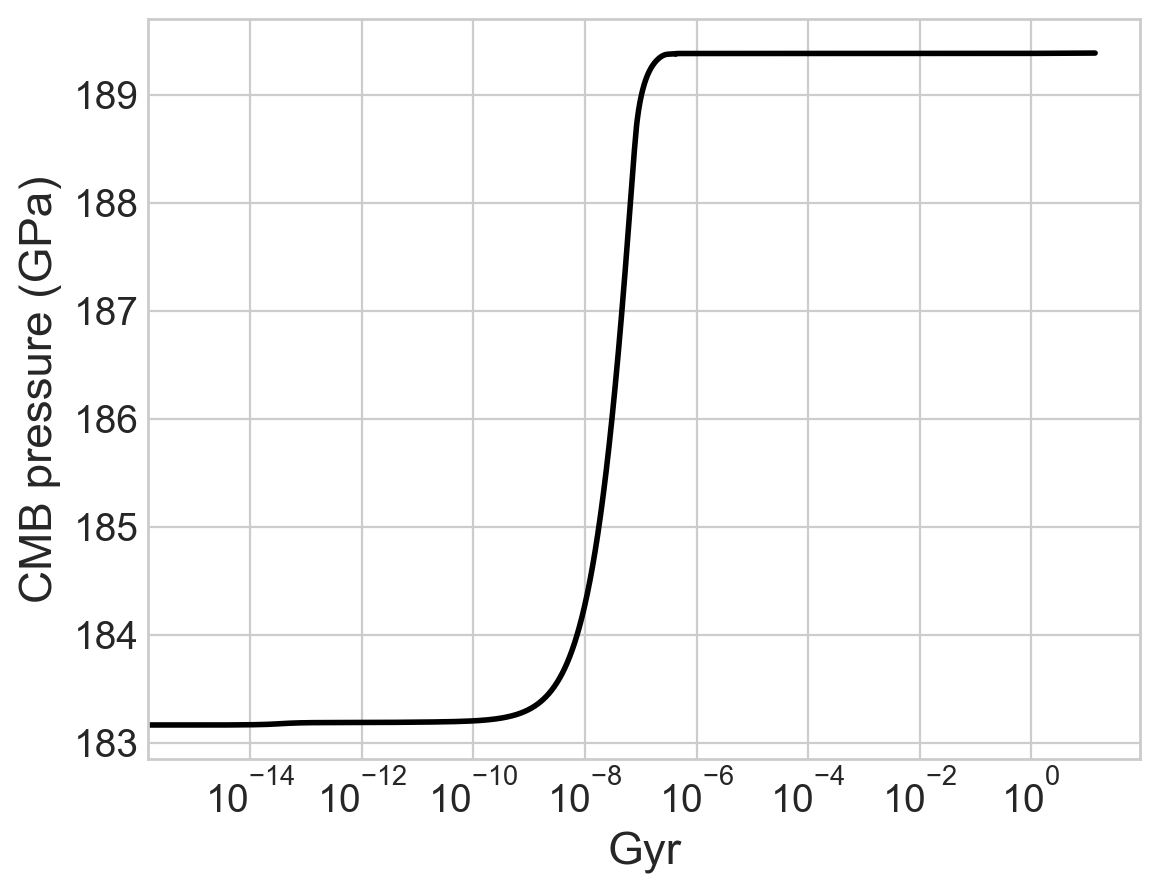

In [24]:
i_x=0
i_y=13
plt.xscale('log')
#plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y]/1e9,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('CMB pressure (GPa)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

In [25]:
# timesteps (years) for which profiles are saved

save_t=[1.0]
for i in range(1,1000):
    if save_t[i-1]<10000.0:
        save_t.append(save_t[i-1]+20.0)
    elif save_t[i-1]<1e8:
        save_t.append(save_t[i-1]+int(save_t[i-1]/20.0))
    else:
        save_t.append(save_t[i-1]+int(save_t[i-1]/50.0))

In [26]:
ind=500 # select a timestep out of save_t
s=np.loadtxt('results/profile/structure_'+str(int(save_t[ind]))+'.txt')
p=np.loadtxt('results/profile/property_'+str(int(save_t[ind]))+'.txt')

### everything is in SI units.
####### s file 
# index   variable
# 0       radius
# 1       pressure
# 2       temperature
# 3       density
# 4       gravity
# 5       mass
####### p file
# index   variable
# 0       thermal expansion coefficient 
# 1       specific heat
# 2       gravity
# 3       Convective flux in the mantle
# 4       Convective velocity in the mantle
# 5       Magnetic Reynolds number
# 6.      viscosity

# pick i_x and i_y and s/p files to set x and y-axis in the following boxes to plot thermal and structural profiles

Text(0.5, 0, 'Gyr')

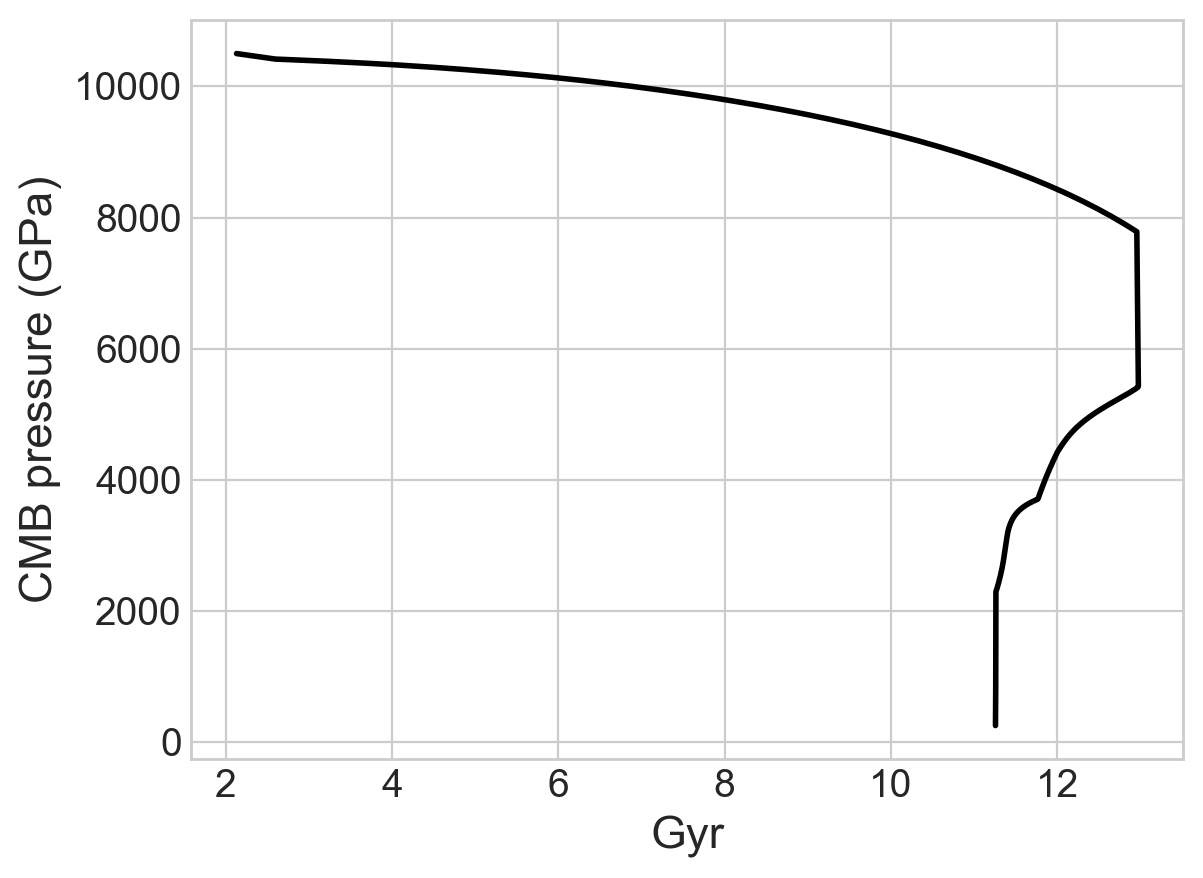

In [37]:
i_x=0
i_y=2
plt.plot(s[:,-1],s[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('CMB pressure (GPa)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 